In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, VarianceThreshold, chi2, f_classif, mutual_info_classif

from XLB import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# WINNER : 47.62% 0.43
feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 61) (750,)
(750, 61) (750,)


In [3]:
themes = ["Calm","Cheerful","Bravery","Fearful","Love","Sadness"]
ovr_train = []
ovr_val = []
ovr_y_smote = []
ovr_y_os = []
for i in range(1,7):
    ovr_train.append(ovr_labels(y_train, i))
    ovr_val.append(ovr_labels(y_val,i))
    ovr_y_os.append(ovr_labels(y_os,i))
    ovr_y_smote.append(ovr_labels(y_smote,i))    

In [4]:
# NuSVC, Randomized Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'nu' : uniform(loc=0.0,scale=0.1),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'shrinking' : [True,False],
    'probability' : [True,False],
    'max_iter' : [600],
    'break_ties' : [True,False]
}

nusvc = svm.NuSVC(random_state=rand_seed)
random_search_nu = RandomizedSearchCV(nusvc, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

Best Score: 0.6037
Vanilla Train Accuracy: 77.8055%
[1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 42.86%
Vanilla F1-score: 0.48
Vanilla Precision Score: 0.66
Vanilla Recall Score: 0.43
Vanilla ROC-AUC Score: 0.46

Best Score: 0.8327
Vanilla Train Accuracy: 100.0000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.77
Vanilla Precision Score: 0.73
Vanilla Recall Score: 0.81
Vanilla ROC-AUC Score: 0.47

Best Score: 0.7832
Vanilla Train Accuracy: 100.0000%
[1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 76.19%
Vanilla F1-score: 0.75
Vanilla Precision Score: 0.74
Vanilla Recall Score: 0.76
Vanilla ROC-AUC Score: 0.57

Best Score: 0.6732
Vanilla Train Accuracy: 95.7606%
[0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Van

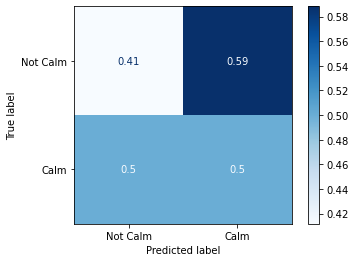

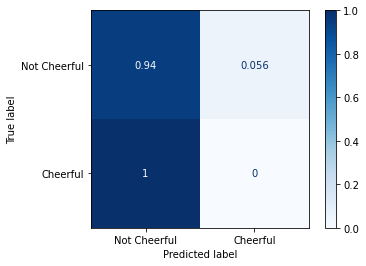

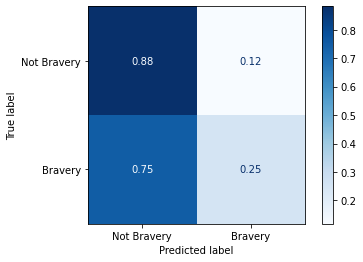

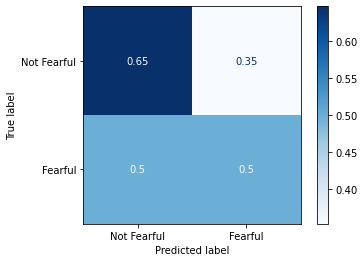

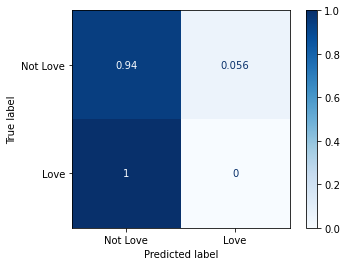

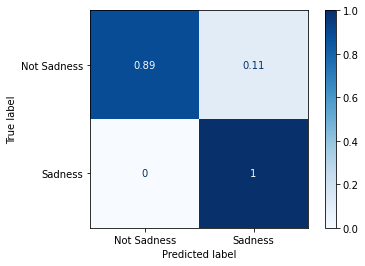

In [5]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_nu, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_nu, themes[i])

Best Score: 0.8373
Random Oversampling Train Accuracy: 100.0000%
[1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 61.90%
Random Oversampling F1-score: 0.66
Random Oversampling Precision Score: 0.87
Random Oversampling Recall Score: 0.62
Random Oversampling ROC-AUC Score: 0.76

Best Score: 0.9600
Random Oversampling Train Accuracy: 99.7333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 85.71%
Random Oversampling F1-score: 0.79
Random Oversampling Precision Score: 0.73
Random Oversampling Recall Score: 0.86
Random Oversampling ROC-AUC Score: 0.50

Best Score: 0.9333
Random Oversampling Train Accuracy: 99.7333%
[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.95%
Random Oversampling F1-score: 0.78
Random Oversampling Precision Score: 0.78
Random O

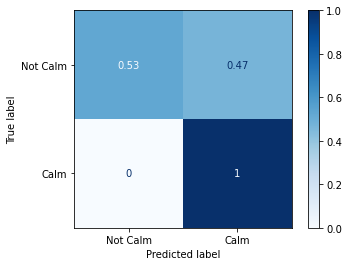

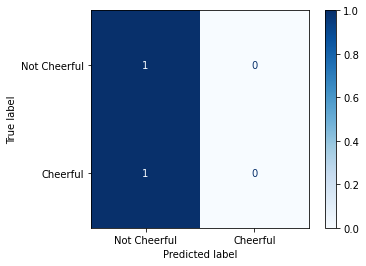

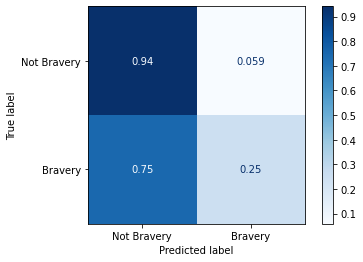

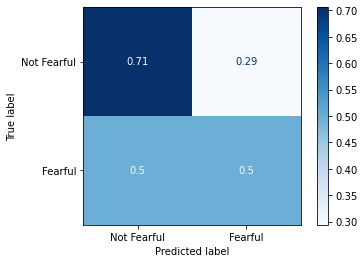

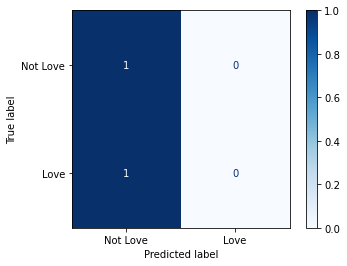

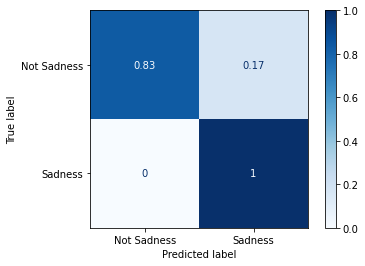

In [6]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_nu,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_nu,themes[i])

Best Score: 0.8347
break_ties => False
kernel => rbf
max_iter => 600
nu => 0.033485281292456974
probability => False
shrinking => True
Splits: 10
SMOTE Train Accuracy: 99.0667%
[0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 61.90%
SMOTE F1-score: 0.66
SMOTE Precision Score: 0.79
SMOTE Recall Score: 0.62
SMOTE ROC-AUC Score: 0.67

Best Score: 0.9600
break_ties => True
kernel => rbf
max_iter => 600
nu => 0.001802952669212199
probability => True
shrinking => False
Splits: 10
SMOTE Train Accuracy: 100.0000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 85.71%
SMOTE F1-score: 0.79
SMOTE Precision Score: 0.73
SMOTE Recall Score: 0.86
SMOTE ROC-AUC Score: 0.50

Best Score: 0.9373
break_ties => True
kernel => rbf
max_iter => 600
nu => 0.043851729817784096
probability => True
shrinking => False
Splits: 10
SMOTE Train Accuracy: 100.0000%
[1 0 0 0 0 0 0 1 0 0 0 

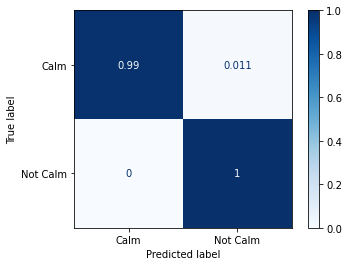

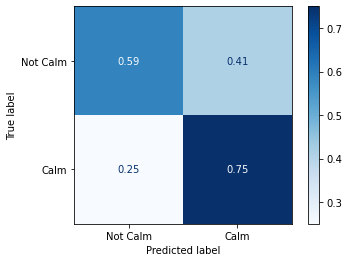

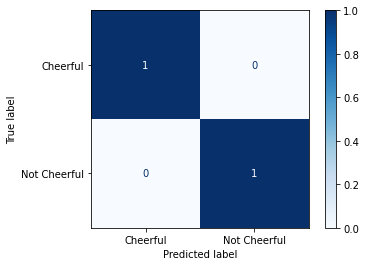

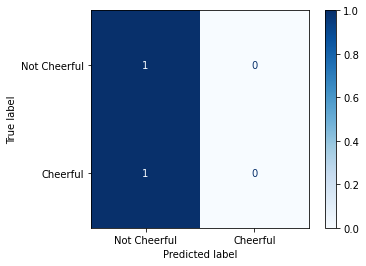

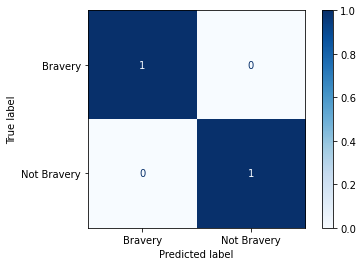

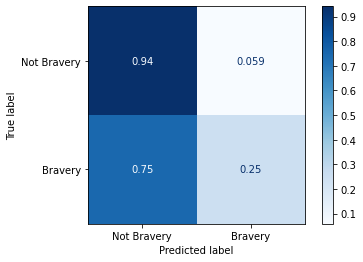

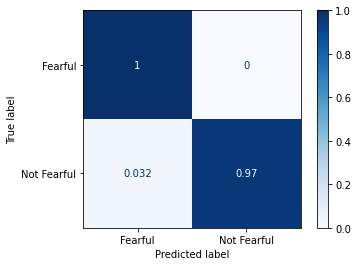

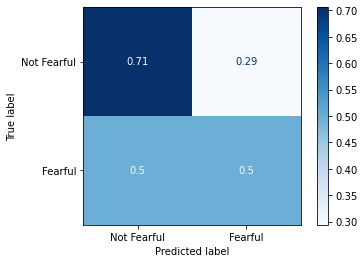

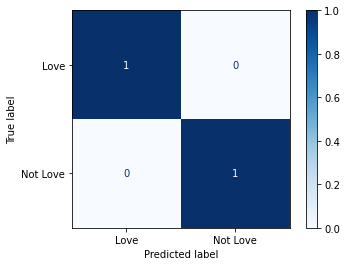

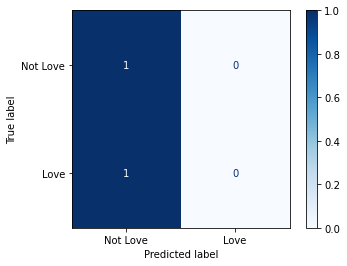

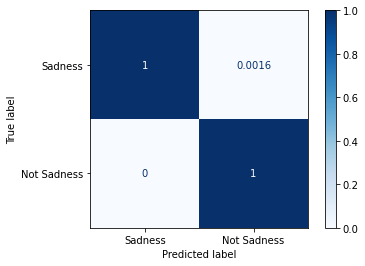

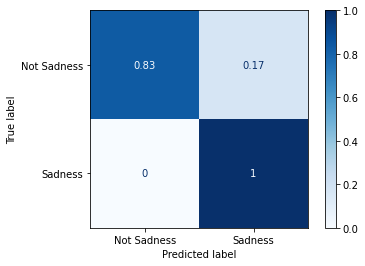

In [7]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_nu,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_nu,themes[i])

In [8]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# WINNER : 42.86% 0.34
feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 61) (750,)
(750, 61) (750,)


In [9]:
# SVM, Grid Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'C': np.logspace(-10,0,100), 
    'gamma': ['scale', 'auto'], 
    'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 
    'shrinking':[True, False], 
    'probability':[True, False],
    'max_iter' : [600],
    'break_ties' : [True, False]
}

svmc = svm.SVC(random_state=rand_seed)
random_search_svm = RandomizedSearchCV(svmc, parameters,\
                                       random_state=rand_seed,\
                                       n_iter=random_search_iterations,\
                                       cv=k_folds,n_jobs=-1)

Best Score: 0.6883
Vanilla Train Accuracy: 68.8279%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72
Vanilla Precision Score: 0.66
Vanilla Recall Score: 0.81
Vanilla ROC-AUC Score: 0.50

Best Score: 0.8629
Vanilla Train Accuracy: 86.2843%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79
Vanilla Precision Score: 0.73
Vanilla Recall Score: 0.86
Vanilla ROC-AUC Score: 0.50

Best Score: 0.8604
Vanilla Train Accuracy: 86.0349%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72
Vanilla Precision Score: 0.66
Vanilla Recall Score: 0.81
Vanilla ROC-AUC Score: 0.50

Best Score: 0.7706
Vanilla Train Accuracy: 87.0324%
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Vanil

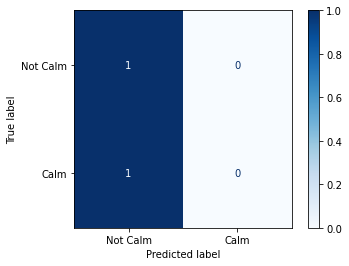

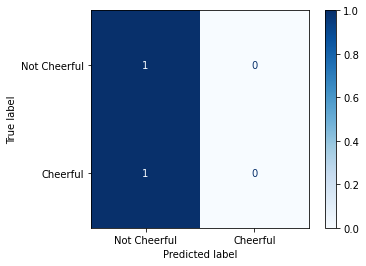

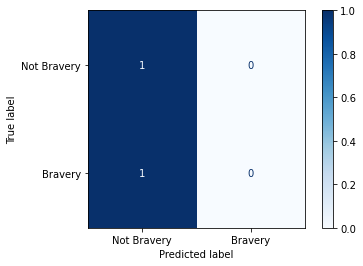

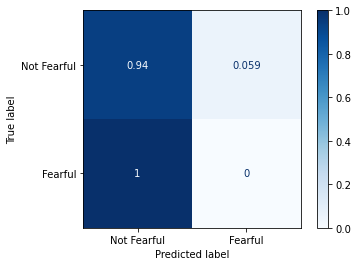

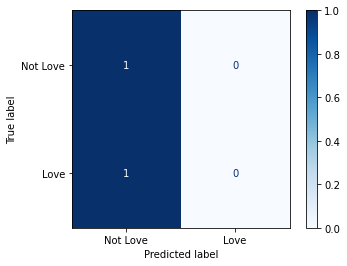

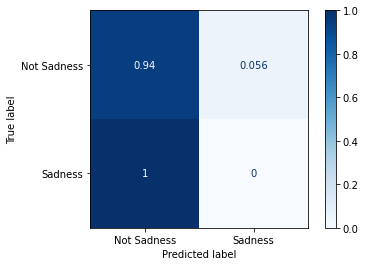

In [10]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_svm, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_svm, themes[i])

Best Score: 0.8347
Random Oversampling Train Accuracy: 91.2000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 76.19%
Random Oversampling F1-score: 0.70
Random Oversampling Precision Score: 0.65
Random Oversampling Recall Score: 0.76
Random Oversampling ROC-AUC Score: 0.47

Best Score: 0.9120
Random Oversampling Train Accuracy: 96.1333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 85.71%
Random Oversampling F1-score: 0.79
Random Oversampling Precision Score: 0.73
Random Oversampling Recall Score: 0.86
Random Oversampling ROC-AUC Score: 0.50

Best Score: 0.8893
Random Oversampling Train Accuracy: 96.5333%
[0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.95%
Random Oversampling F1-score: 0.78
Random Oversampling Precision Score: 0.78
Random Ov

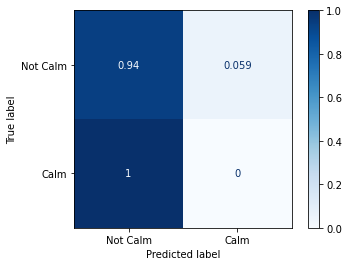

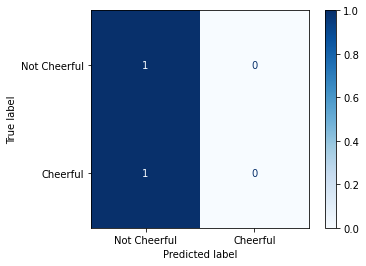

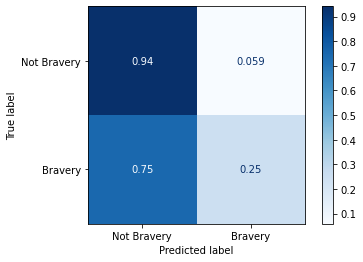

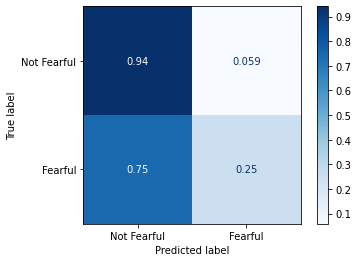

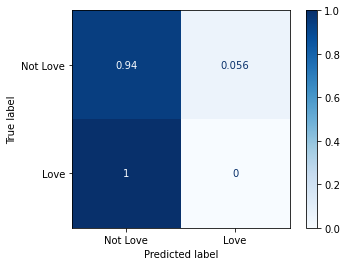

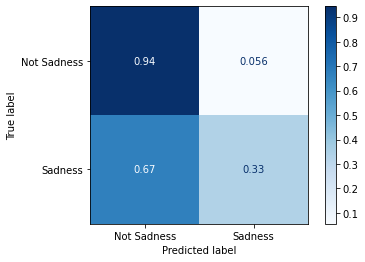

In [11]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_svm,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_svm,themes[i])

Best Score: 0.8347
shrinking => True
probability => False
max_iter => 600
kernel => poly
gamma => scale
break_ties => False
C => 0.09770099572992247
Splits: 10
SMOTE Train Accuracy: 84.1333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 80.95%
SMOTE F1-score: 0.72
SMOTE Precision Score: 0.66
SMOTE Recall Score: 0.81
SMOTE ROC-AUC Score: 0.50

Best Score: 0.9293
shrinking => True
probability => False
max_iter => 600
kernel => poly
gamma => scale
break_ties => True
C => 1.0
Splits: 10
SMOTE Train Accuracy: 97.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 85.71%
SMOTE F1-score: 0.79
SMOTE Precision Score: 0.73
SMOTE Recall Score: 0.86
SMOTE ROC-AUC Score: 0.50

Best Score: 0.8840
shrinking => True
probability => False
max_iter => 600
kernel => poly
gamma => scale
break_ties => True
C => 1.0
Splits: 10
SMOTE Train Accuracy: 96.0000%
[0 1 0 0 0 0 0 

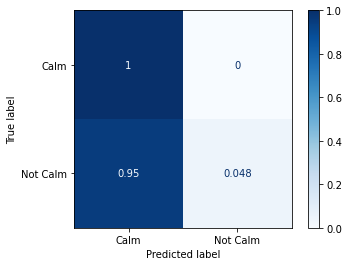

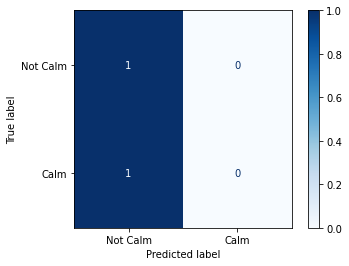

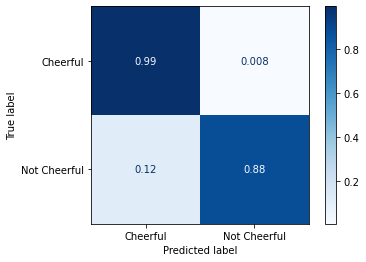

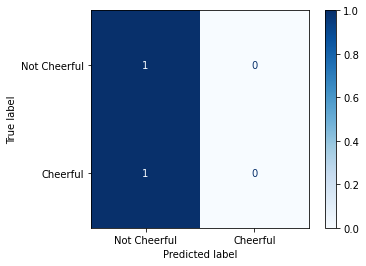

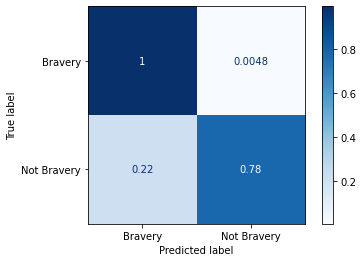

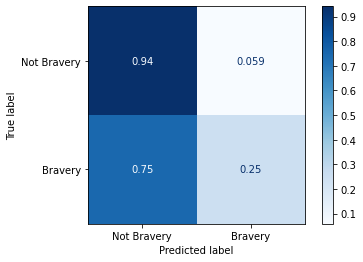

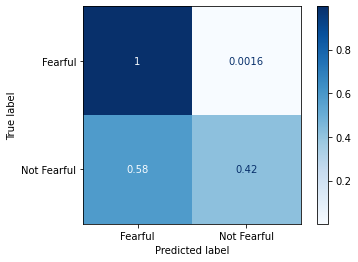

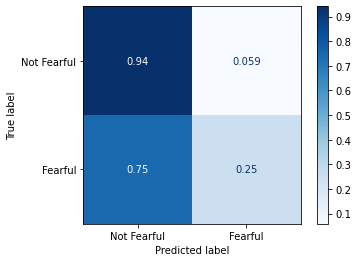

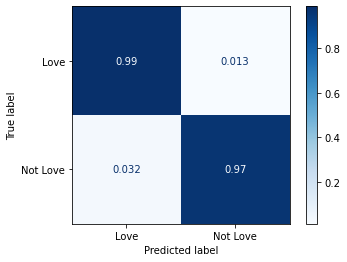

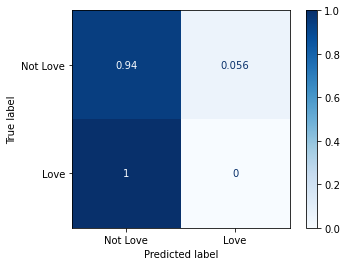

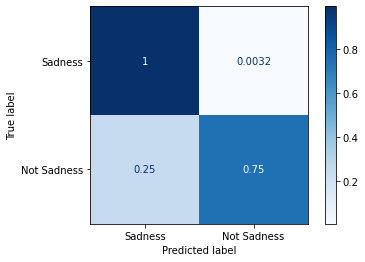

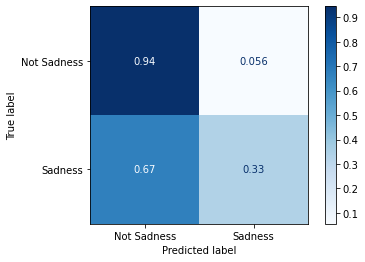

In [12]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_svm,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_svm,themes[i])

In [13]:
## extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# 28.57% 0.28
feat_sel_2 = SelectKBest(chi2,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 45) (750,)
(750, 45) (750,)


In [14]:
# LinearSVM, Randomized Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'penalty':['l1', 'l2'],
    'loss':['hinge', 'squared_hinge'], 
    'dual':[True, False], 
    'C': np.logspace(-10,0,100), 
    'multi_class':['ovr', 'crammer_singer'], 
    'fit_intercept' : [True,False],
    'max_iter':[600]
}

linearsvm = svm.LinearSVC(random_state=rand_seed)
random_search_linear = RandomizedSearchCV(linearsvm, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

Best Score: 0.6905
Vanilla Train Accuracy: 70.5736%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72
Vanilla Precision Score: 0.66
Vanilla Recall Score: 0.81
Vanilla ROC-AUC Score: 0.50

Best Score: 0.8629
Vanilla Train Accuracy: 86.2843%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79
Vanilla Precision Score: 0.73
Vanilla Recall Score: 0.86
Vanilla ROC-AUC Score: 0.50

Best Score: 0.8604
Vanilla Train Accuracy: 86.0349%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72
Vanilla Precision Score: 0.66
Vanilla Recall Score: 0.81
Vanilla ROC-AUC Score: 0.50

Best Score: 0.7556
Vanilla Train Accuracy: 75.8105%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Vanil

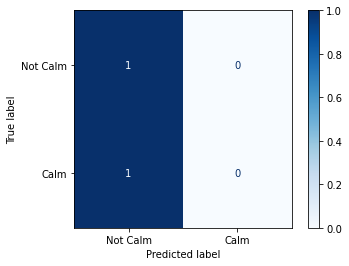

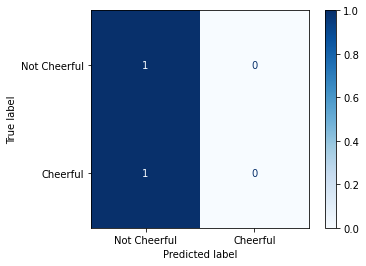

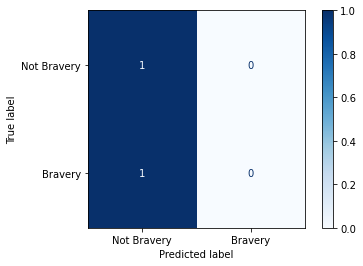

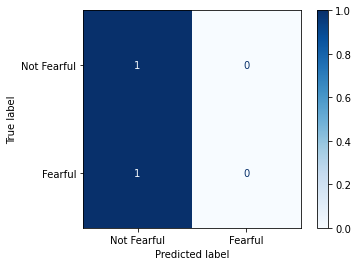

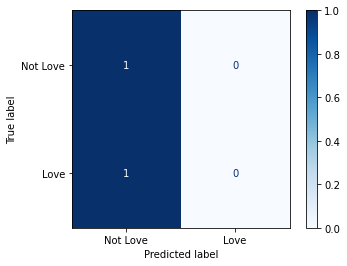

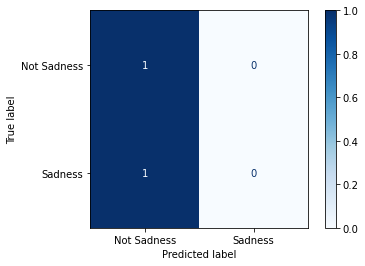

In [15]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_linear, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_linear, themes[i])

Best Score: 0.8333
Random Oversampling Train Accuracy: 83.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.95%
Random Oversampling F1-score: 0.72
Random Oversampling Precision Score: 0.66
Random Oversampling Recall Score: 0.81
Random Oversampling ROC-AUC Score: 0.50

Best Score: 0.8347
Random Oversampling Train Accuracy: 83.8667%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 85.71%
Random Oversampling F1-score: 0.79
Random Oversampling Precision Score: 0.73
Random Oversampling Recall Score: 0.86
Random Oversampling ROC-AUC Score: 0.50

Best Score: 0.8400
Random Oversampling Train Accuracy: 84.8000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.95%
Random Oversampling F1-score: 0.72
Random Oversampling Precision Score: 0.66
Random Ov

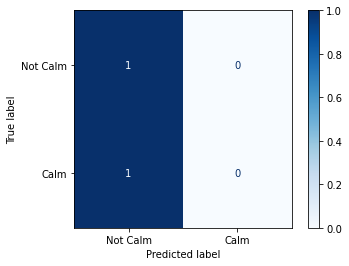

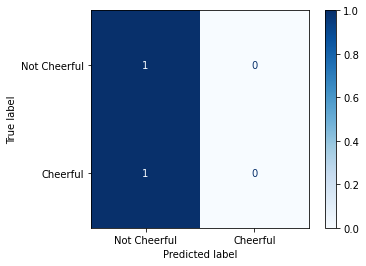

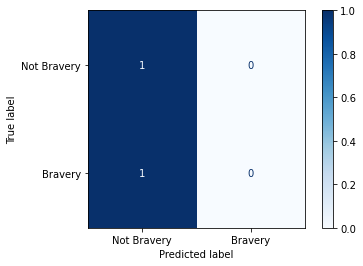

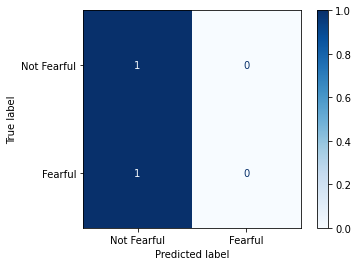

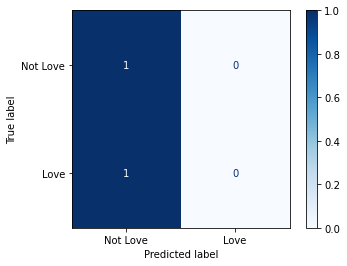

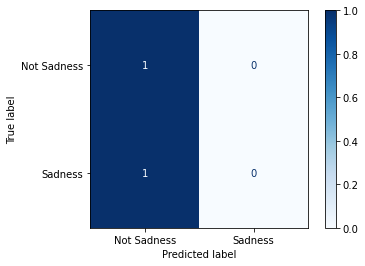

In [16]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_linear,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_linear,themes[i])

Best Score: 0.8333
penalty => l2
multi_class => crammer_singer
max_iter => 600
loss => squared_hinge
fit_intercept => False
dual => False
C => 0.007564633275546291
Splits: 10
SMOTE Train Accuracy: 83.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 80.95%
SMOTE F1-score: 0.72
SMOTE Precision Score: 0.66
SMOTE Recall Score: 0.81
SMOTE ROC-AUC Score: 0.50

Best Score: 0.8333
penalty => l2
multi_class => crammer_singer
max_iter => 600
loss => squared_hinge
fit_intercept => False
dual => False
C => 0.007564633275546291
Splits: 10
SMOTE Train Accuracy: 83.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 85.71%
SMOTE F1-score: 0.79
SMOTE Precision Score: 0.73
SMOTE Recall Score: 0.86
SMOTE ROC-AUC Score: 0.50

Best Score: 0.8333
penalty => l2
multi_class => crammer_singer
max_iter => 600
loss => squared_hinge
fit_intercept => False
dual => False
C =>

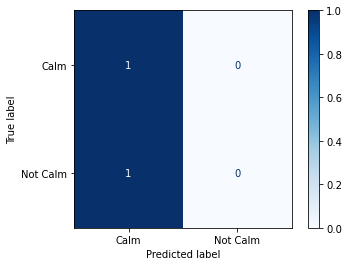

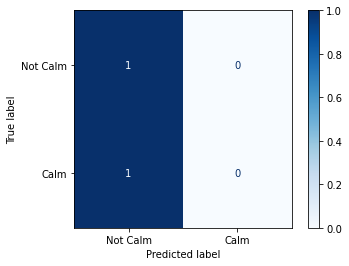

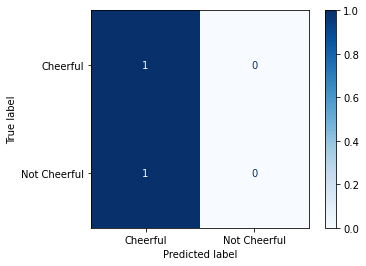

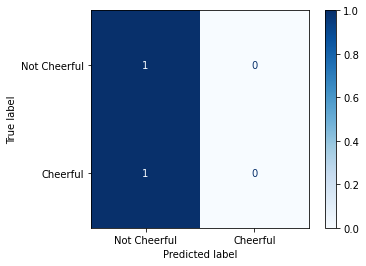

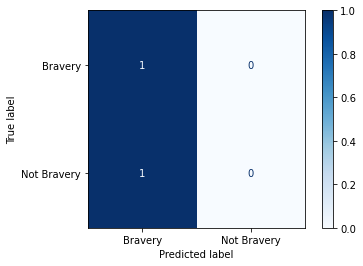

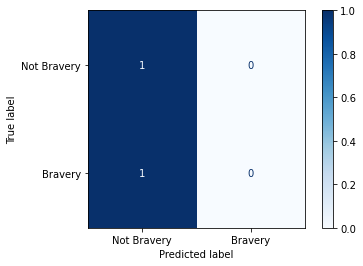

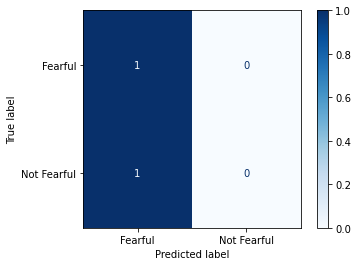

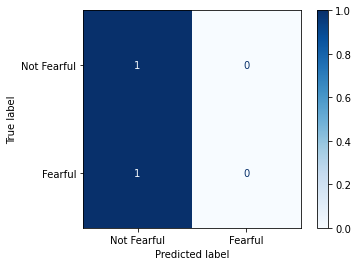

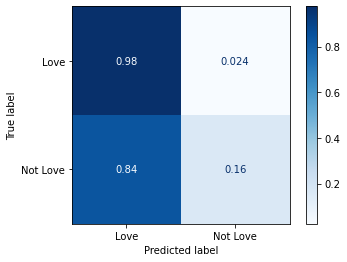

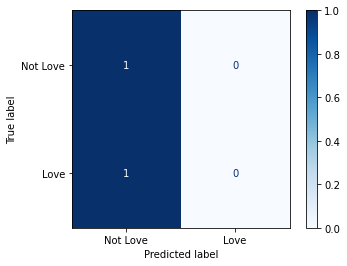

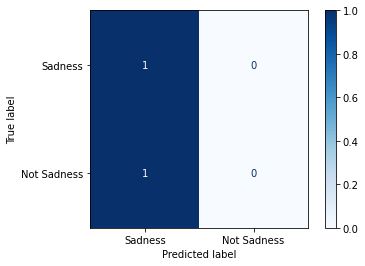

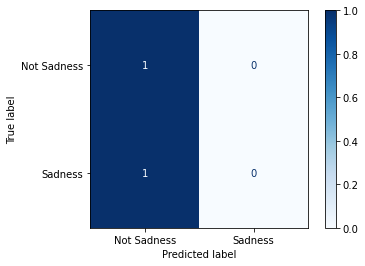

In [17]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_linear,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_linear,themes[i])